In [18]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.figure_factory as ff
import addfips
import os
import plotly.io as pio
import kaleido

In [2]:
file='data/reduced_tx_fips.csv'


In [3]:
#import traffic accident data

df=pd.read_csv(file)
df.columns

Index(['fips', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
dfgroup=df[['State','County','City','fips','TMC','Start_Lat','Start_Lng','Severity','Description','Street','Distance(mi)','Start_Time']]
dfgrouptx=dfgroup[dfgroup['State']=='TX']
dfgrouptx['Year']=pd.DatetimeIndex(dfgrouptx['Start_Time']).year
dfgrouptx['count']=1
dfgrouptx=dfgrouptx[['Year','State','County','City','fips','TMC','Start_Lat','Start_Lng','Severity','Description','Street','Distance(mi)','Start_Time','count']]
dfgrouptx

,Year,State,County,City,fips,TMC,Start_Lat,Start_Lng,Severity,Description,Street,Distance(mi),Start_Time,count
261002,2016,TX,Travis,Austin,48453.0,201.0,30.336502,-97.755646,2,Accident on RM-2222 Northland Dr at Mo Pac Exp...,Mopac Expy S,0.010,2016-11-30 16:03:54,1
261003,2016,TX,Travis,Austin,48453.0,201.0,30.328165,-97.694305,2,Accident on Grand Canyon Dr between Westheimer...,E Saint Johns Ave,0.000,2016-11-30 16:32:18,1
261004,2016,TX,Travis,Austin,48453.0,201.0,30.326077,-97.692307,2,Accident on Saint Johns Ave at Cameron Rd.,Cameron Rd,0.000,2016-11-30 16:31:45,1
261005,2016,TX,Tarrant,Fort Worth,48439.0,201.0,32.856014,-97.513084,2,#2 lane blocked and right hand shoulder blocke...,Hanger Cutoff Rd,0.010,2016-11-30 16:06:49,1
261006,2016,TX,Tarrant,Fort Worth,48439.0,201.0,32.797668,-97.212090,3,#2 lane blocked and right hand shoulder blocke...,I-820 N,0.010,2016-11-30 16:35:01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232273,2019,TX,Harris,Houston,48201.0,NaN,29.749589,-95.456110,2,At FM-1093/Westheimer Rd/Exit 8 - Accident.,I-610 S,0.493,2019-08-23 13:16:19,1
4232274,2019,TX,Harris,Houston,48201.0,NaN,29.778089,-95.373146,3,At I-45/Smith St - Accident.,I-10 E,0.399,2019-08-23 13:04:19,1
4232275,2019,TX,Harris,Houston,48201.0,NaN,29.774190,-95.320940,3,At Lockwood Dr/Exit 771B - Accident.,US-90 E,0.520,2019-08-23 13:00:34,1
4232277,2019,TX,Harris,Humble,48201.0,NaN,29.941686,-95.295187,3,At Aldine Bender Rd - Accident. Two lanes bloc...,US-59 N,1.153,2019-08-23 16:44:23,1


In [6]:
dfgrouptx.reset_index(inplace=True)
del dfgrouptx['index']
dfgrouptx

,Year,State,County,City,fips,TMC,Start_Lat,Start_Lng,Severity,Description,Street,Distance(mi),Start_Time,count
0,2016,TX,Travis,Austin,48453.0,201.0,30.336502,-97.755646,2,Accident on RM-2222 Northland Dr at Mo Pac Exp...,Mopac Expy S,0.010,2016-11-30 16:03:54,1
1,2016,TX,Travis,Austin,48453.0,201.0,30.328165,-97.694305,2,Accident on Grand Canyon Dr between Westheimer...,E Saint Johns Ave,0.000,2016-11-30 16:32:18,1
2,2016,TX,Travis,Austin,48453.0,201.0,30.326077,-97.692307,2,Accident on Saint Johns Ave at Cameron Rd.,Cameron Rd,0.000,2016-11-30 16:31:45,1
3,2016,TX,Tarrant,Fort Worth,48439.0,201.0,32.856014,-97.513084,2,#2 lane blocked and right hand shoulder blocke...,Hanger Cutoff Rd,0.010,2016-11-30 16:06:49,1
4,2016,TX,Tarrant,Fort Worth,48439.0,201.0,32.797668,-97.212090,3,#2 lane blocked and right hand shoulder blocke...,I-820 N,0.010,2016-11-30 16:35:01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376440,2019,TX,Harris,Houston,48201.0,NaN,29.749589,-95.456110,2,At FM-1093/Westheimer Rd/Exit 8 - Accident.,I-610 S,0.493,2019-08-23 13:16:19,1
376441,2019,TX,Harris,Houston,48201.0,NaN,29.778089,-95.373146,3,At I-45/Smith St - Accident.,I-10 E,0.399,2019-08-23 13:04:19,1
376442,2019,TX,Harris,Houston,48201.0,NaN,29.774190,-95.320940,3,At Lockwood Dr/Exit 771B - Accident.,US-90 E,0.520,2019-08-23 13:00:34,1
376443,2019,TX,Harris,Humble,48201.0,NaN,29.941686,-95.295187,3,At Aldine Bender Rd - Accident. Two lanes bloc...,US-59 N,1.153,2019-08-23 16:44:23,1


In [7]:
dfgrouptx.to_csv('data/fipstx.csv',index=True,header=True)

In [8]:
#af=addfips.AddFIPS()
#counties=dfgrouptx['County']
#counties
#dfgrouptx["fips"]=""
#dfgrouptx
#fips=[]
#for index, row in dfgrouptx.iterrows():
#    county=row["County"]
#    state=row["State"]
#    if row["fips"]=="":
#        af.get_county_fips(county,state)
#        dfgrouptx.loc[index, "fips"] = af.add_county_fips(row,county,state)
#    print index
#    print dfgrouptx.loc[index,'fips']
#    continue

#for county in counties
#af.add_county_fips(dfgrouptx,row,county_field='County',state_field='state')

In [9]:
dfgrouptx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376445 entries, 0 to 376444
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          376445 non-null  int64  
 1   State         376445 non-null  object 
 2   County        376445 non-null  object 
 3   City          376445 non-null  object 
 4   fips          376445 non-null  float64
 5   TMC           301303 non-null  float64
 6   Start_Lat     376445 non-null  float64
 7   Start_Lng     376445 non-null  float64
 8   Severity      376445 non-null  int64  
 9   Description   376444 non-null  object 
 10  Street        376445 non-null  object 
 11  Distance(mi)  376445 non-null  float64
 12  Start_Time    376445 non-null  object 
 13  count         376445 non-null  int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 40.2+ MB


In [10]:
groupcountstx=dfgrouptx.groupby(['fips','Year','County','City'])

In [25]:
groupcountytx=dfgrouptx.groupby(['fips','Year','County'])
groupcountytx.sum().sort_values("count")
groupcountstx.sum().to_csv('data/countyyear.csv')
groupcountstx.sum().sort_values("count").to_csv('groupcoutytxdata.csv')

In [12]:
#countyvaluecounts=dfgrouptx['County'].value_counts().to_frame()
#countyvaluecounts=dfgrouptx=pd.DataFrame(countyvaluecounts)
#countyvaluecounts=dfgrouptx=countyvaluecounts_df.reset_index()
#countyvaluecounts=dfgrouptx.columns=['County','Counts']
#countyvaluecounts

In [13]:
fipsvaluecounts=df['fips'].value_counts().to_frame()
fipsvaluecounts_df=pd.DataFrame(fipsvaluecounts)
fipsvaluecounts_df=fipsvaluecounts_df.reset_index()
fipsvaluecounts_df.columns=['Fips','Counts']
fipsvaluecounts_df

,Fips,Counts
0,48201.0,122233
1,48361.0,110750
2,48113.0,91061
3,48339.0,81373
4,48453.0,76844
...,...,...
218,48237.0,1
219,48207.0,1
220,48165.0,1
221,48125.0,1


In [20]:
values = fipsvaluecounts_df['Counts'].tolist()
fips = fipsvaluecounts_df['Fips'].tolist()

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"]

endpts = list(np.linspace(0, 45000, len(colorscale) - 1))


fig = ff.create_choropleth(
    fips=fips, values=values, scope=['TX'],
    binning_endpoints=endpts, colorscale=colorscale,    
    county_outline={'color': 'rgb(0,0,0)', 'width': 0.5}, round_legend_values=False,
    legend_title='Traffic Accidents by County', title='Total Texas Auto Accidents 2016-2020'
)
fig.layout.template = None

fig.show()
#image_bytes=fig.to_image(format='png')
fig.write_image("data/txchoroplethmap.svg")

images_bytes=txchoroplethmap.to_image(format='png')



ValueError: 
The kaleido executable is required by the kaleido Python library, but it was not included
in the Python package and it could not be found on the system PATH.

Searched for included kaleido executable at:
    /Users/imacpro/opt/anaconda3/lib/python3.8/site-packages/kaleido/executable/kaleido 

Searched for executable 'kaleido' on the following system PATH:
    /Library/Frameworks/Python.framework/Versions/3.9/bin
    /usr/local/bin
    /usr/bin
    /bin
    /usr/sbin
    /sbin
    /Library/Apple/usr/bin


In [ ]:
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"]

endpts = list(np.linspace(0, 45000, len(colorscale) - 1))

import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=counties, locations=fips, color=colorscale,
                           color_continuous_scale="blues",
                           range_color=(0, 45000),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'values':'Traffic Accidents'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

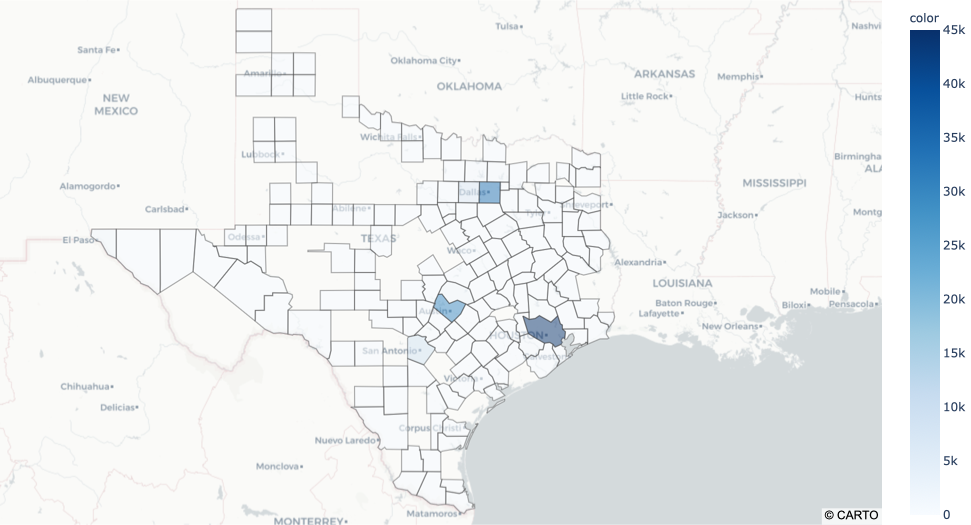